<a href="https://colab.research.google.com/github/atmaivancevic/AlphaGenome_Tests/blob/main/IFNAR2_AlphaGenome_AtmaVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Run AlphaGenome to look at IFNAR2 SNPs

In [ ]:
# @title Install AlphaGenome

# @markdown Run this cell to install AlphaGenome.
from IPython.display import clear_output
! pip install alphagenome
clear_output()

In [ ]:
# @title Imports
from alphagenome import colab_utils
from alphagenome.data import gene_annotation
from alphagenome.data import genome
from alphagenome.data import transcript as transcript_utils
from alphagenome.interpretation import ism
from alphagenome.models import dna_client
from alphagenome.models import variant_scorers
from alphagenome.visualization import plot_components
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# @title Setup and Further Imports
dna_model = dna_client.create(colab_utils.get_api_key())

HG38_GTF_FEATHER = (
    'https://storage.googleapis.com/alphagenome/reference/gencode/'
    'hg38/gencode.v46.annotation.gtf.gz.feather'
)

# Initialize an empty dictionary to serve as a variant effect prediction cache.
_prediction_cache = {}

_transcript_extractor_cache = {}

In [ ]:
# @title Score variant { run: "auto" }
organism = 'human'  # @param ["human", "mouse"] {type:"string"}
organism_map = {
    'human': dna_client.Organism.HOMO_SAPIENS
}
organism = organism_map[organism]

# @markdown Specify the variant:
variant_chromosome = 'chr21'  # @param { type:"string" }
variant_position = 33262573  # @param { type:"integer" }
variant_reference_bases = 'G'  # @param { type:"string" }
variant_alternate_bases = 'T'  # @param { type:"string" }

variant = genome.Variant(
    chromosome=variant_chromosome,
    position=variant_position,
    reference_bases=variant_reference_bases,
    alternate_bases=variant_alternate_bases,
)

# @markdown Specify length of sequence around variant to predict:
sequence_length = "100KB"  # @param ["2KB", "16KB","100KB", "500KB", "1MB"] { type:"string" }
sequence_length = dna_client.SUPPORTED_SEQUENCE_LENGTHS[
    f'SEQUENCE_LENGTH_{sequence_length}'
]

# The input interval is derived from the variant (centered on it).
interval = variant.reference_interval.resize(sequence_length)

# @markdown Additional settings:
variant_scores = dna_model.score_variant(
    interval=interval,
    variant=variant,
    variant_scorers=list(variant_scorers.RECOMMENDED_VARIANT_SCORERS.values()),
)

df_scores = variant_scorers.tidy_scores(variant_scores)

download_predictions = False  # @param { type: "boolean" }
if download_predictions:
  df_scores.to_csv(f'{variant}_scores.csv', index=False)
  files.download(f'{variant}_scores.csv')

# @markdown Click `Filter` on the upper right hand side of the interactive dataframe and type a cell or tissue name like "brain" into the `Search by all fields box` to subset the variant scores to a specific tissue of interest:
columns = [
    c for c in df_scores.columns if c not in ['variant_id', 'scored_interval']
]
df_scores[columns]

,gene_id,gene_name,gene_type,gene_strand,junction_Start,junction_End,output_type,variant_scorer,track_name,track_strand,Assay title,ontology_curie,biosample_name,biosample_type,transcription_factor,histone_mark,gtex_tissue,raw_score,quantile_score
0,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000084 ATAC-seq,.,ATAC-seq,CL:0000084,T-cell,primary_cell,NaN,NaN,NaN,0.041876,0.853515
1,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000100 ATAC-seq,.,ATAC-seq,CL:0000100,motor neuron,in_vitro_differentiated_cells,NaN,NaN,NaN,0.011717,0.270000
2,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000236 ATAC-seq,.,ATAC-seq,CL:0000236,B cell,primary_cell,NaN,NaN,NaN,0.053245,0.873985
3,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000623 ATAC-seq,.,ATAC-seq,CL:0000623,natural killer cell,primary_cell,NaN,NaN,NaN,0.022160,0.680793
4,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000624 ATAC-seq,.,ATAC-seq,CL:0000624,"CD4-positive, alpha-beta T cell",primary_cell,NaN,NaN,NaN,0.052859,0.876682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16033,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR182QNJ,-,PRO-cap,EFO:0001099,Caco-2,cell_line,NaN,NaN,NaN,0.185318,0.557425
16034,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR740IPL,-,PRO-cap,EFO:0002067,K562,cell_line,NaN,NaN,NaN,0.701895,0.650888
16035,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR797DEF,-,PRO-cap,EFO:0002819,Calu3,cell_line,NaN,NaN,NaN,0.252503,0.635000
16036,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR801ECP,-,PRO-cap,CL:0002618,endothelial cell of umbilical vein,primary_cell,NaN,NaN,NaN,0.235944,0.629636


Requested plot for output ATAC but no tracks exist in output. This is likely because this output does not exist for your ontologies or requested DNA strand.


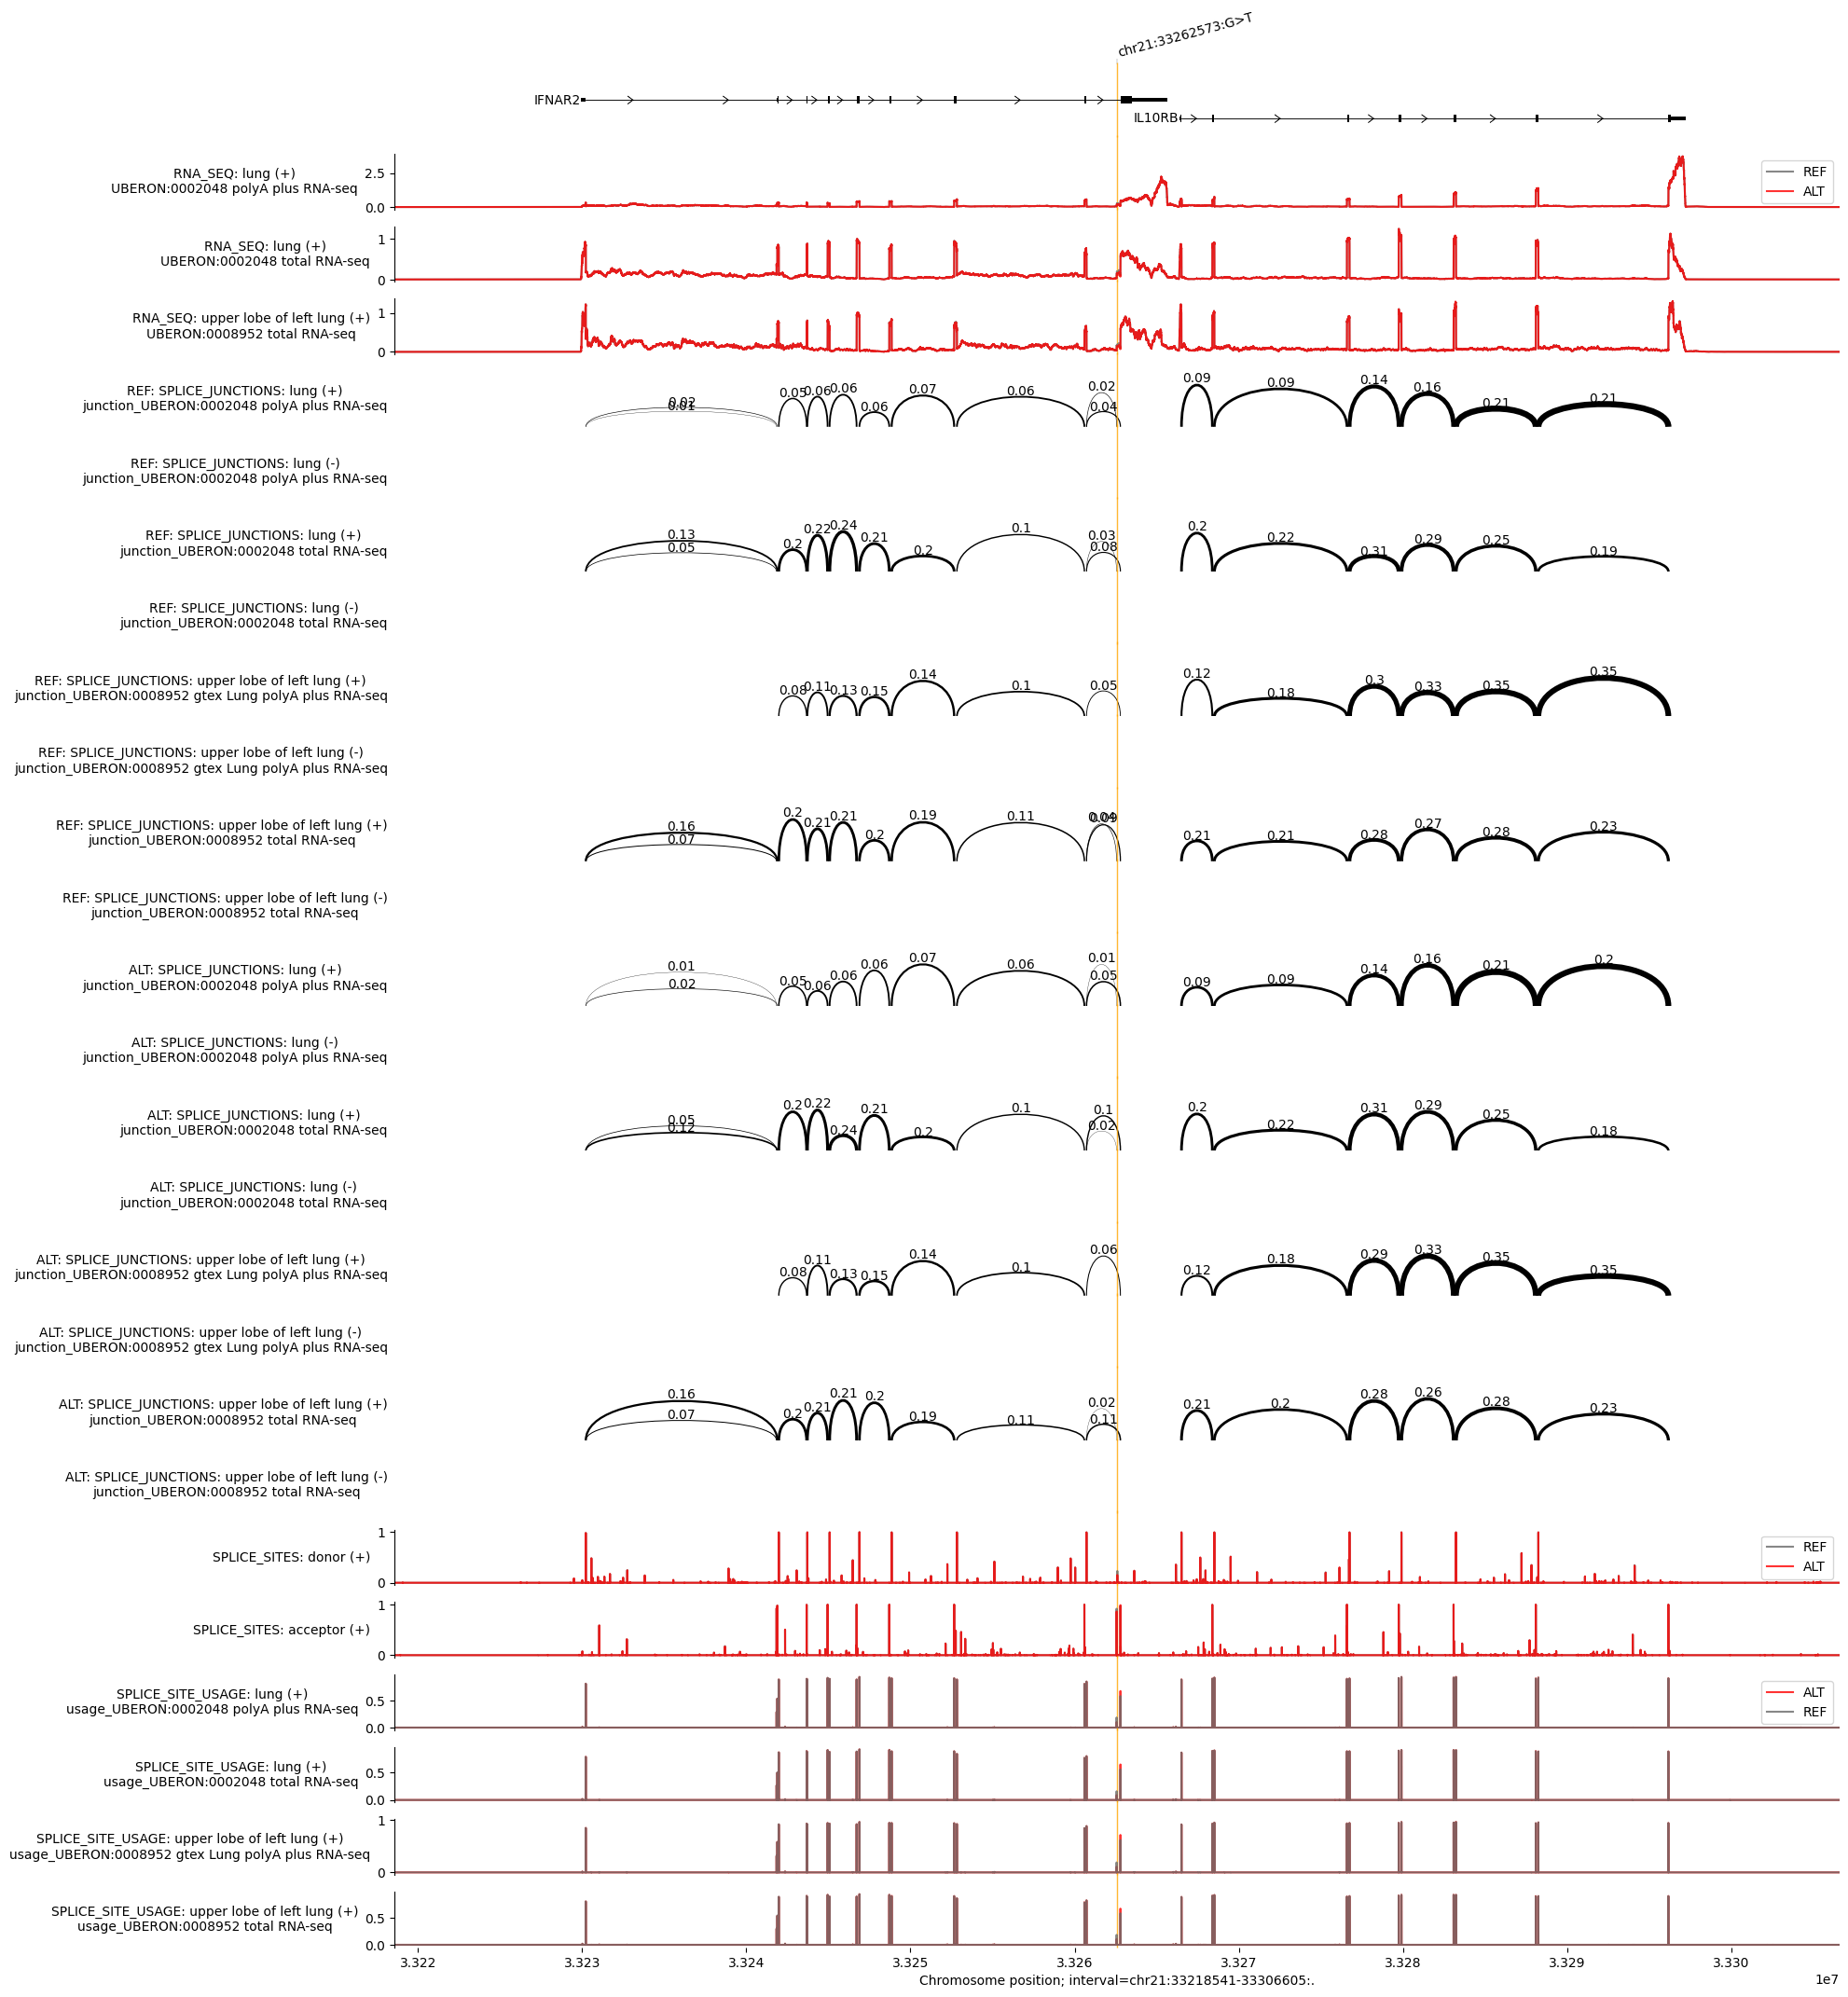

In [ ]:
# @title Visualize variant effects { run: "auto" }
# @markdown We can also visualise the predicted effects of the variant by first predicting tracks for the REF and ALT alleles:

# @markdown Specify list of cell and tissue ontologies:
ontology_terms = ['UBERON:0002048', 'UBERON:0008952']  # @param

#0002405 > immune system - apparently not supported?
#0002048 > lung
#	UBERON:0008952 > gtex lung
#0000955 > brain
#UBERON:0002106 > Gtex spleen
#UBERON:0000029 > lymph node
#UBERON:0002370 > thymus
#EFO: 0000025 > Blood
#UBERON:0001474 > Blood - not supported
#UBERON:0013756 > Gtex Blood
#CL:0000084 > T cell
#CL:0000236 > B cell
#CL:0000094 > macrophage


# @markdown Gene and transcript annotation options:
plot_gene_annotation = True  # @param { type: "boolean" }
plot_longest_transcript_only = True  # @param { type: "boolean" }

# @markdown Output types to plot (if present in output):
plot_rna_seq = True  # @param { type: "boolean" }
plot_cage = False  # @param { type: "boolean" }
plot_atac = True  # @param { type: "boolean" }
plot_dnase = False  # @param { type: "boolean" }
plot_chip_histone = False  # @param { type: "boolean" }
plot_chip_tf = False  # @param { type: "boolean" }
plot_splice_sites = True  # @param { type: "boolean" }
plot_splice_site_usage = True  # @param { type: "boolean" }
plot_contact_maps = False  # @param { type: "boolean" }
plot_splice_junctions = True # @param { type: "boolean" }

# @markdown Option to filter tracks to only a specific DNA strand:
filter_to_positive_strand = True  # @param { type: "boolean" }
filter_to_negative_strand = False  # @param { type: "boolean" }
if filter_to_positive_strand and filter_to_negative_strand:
  raise ValueError(
      'Cannot specify both filter_to_positive_strand and '
      'filter_to_negative_strand.'
  )

# @markdown Other visualization options:
ref_color = 'dimgrey'  # @param { type: "string" }
alt_color = 'red'  # @param { type: "string" }
ref_alt_colors = {'REF': ref_color, 'ALT': alt_color}
plot_interval_width = 88064 # @param { type: "slider", min: 2048, max: 1048576, step: 2048}
plot_interval_shift = 0 # @param { type: "slider", min: -524288, max: 524288, step: 2048}

# Import transcript module
from alphagenome.data import transcript as transcript_utils

# Load gene annotation.
if organism in _transcript_extractor_cache:
  transcript_extractor, longest_transcript_extractor = (
      _transcript_extractor_cache[organism]
  )
else:
  match organism:
    case dna_client.Organism.HOMO_SAPIENS:
      gtf_path = HG38_GTF_FEATHER
    case dna_client.Organism.MUS_MUSCULUS:
      gtf_path = MM10_GTF_FEATHER
    case _:
      raise ValueError(f'Unsupported organism: {organism}')

  gtf = pd.read_feather(gtf_path)

  # Filter to protein-coding genes and highly supported transcripts.
  gtf_transcript = gene_annotation.filter_transcript_support_level(
      gene_annotation.filter_protein_coding(gtf), ['1']
  )

  # Extractor for identifying transcripts in a region.
  transcript_extractor = transcript_utils.TranscriptExtractor(gtf_transcript)

  # Also define an extractor that fetches only the longest transcript per gene.
  gtf_longest_transcript = gene_annotation.filter_to_longest_transcript(
      gtf_transcript
  )
  longest_transcript_extractor = transcript_utils.TranscriptExtractor(
      gtf_longest_transcript
  )
  _transcript_extractor_cache[organism] = (
      transcript_extractor,
      longest_transcript_extractor,
  )


def _predict_variant_cached(
    interval, variant, organism, requested_outputs, ontology_terms
):
  """Cache wrapper of dna_model.predict_variant."""
  # Create a unique key from the function arguments.
  cache_key = (
      str(interval),
      str(variant),
      str(organism),
      tuple(requested_outputs),
      tuple(ontology_terms),
  )

  # Check if the result is already in the cache.
  if cache_key in _prediction_cache:
    return _prediction_cache[cache_key]

  # If not, compute the prediction and store it in the cache.
  result = dna_model.predict_variant(
      interval=interval,
      variant=variant,
      organism=organism,
      requested_outputs=requested_outputs,
      ontology_terms=ontology_terms,
  )
  _prediction_cache[cache_key] = result
  return result


output = _predict_variant_cached(
    interval=interval,
    variant=variant,
    organism=organism,
    requested_outputs=[*dna_client.OutputType],
    ontology_terms=ontology_terms,
)

# Filter to DNA strand if requested.
ref, alt = output.reference, output.alternate

if filter_to_positive_strand:
  ref = ref.filter_to_strand(strand='+')
  alt = alt.filter_to_strand(strand='+')
elif filter_to_negative_strand:
  ref = ref.filter_to_strand(strand='-')
  alt = alt.filter_to_strand(strand='-')

# Build plot.
components = []

# Gene and transcript annotation.
if plot_gene_annotation:
  if plot_longest_transcript_only:
    transcripts = longest_transcript_extractor.extract(interval)
  else:
    transcripts = transcript_extractor.extract(interval)
  components.append(plot_components.TranscriptAnnotation(transcripts))

# Individual output type plots.
plot_map = {
    'plot_atac': (ref.atac, alt.atac, 'ATAC'),
    'plot_cage': (ref.cage, alt.cage, 'CAGE'),
    'plot_chip_histone': (ref.chip_histone, alt.chip_histone, 'CHIP_HISTONE'),
    'plot_chip_tf': (ref.chip_tf, alt.chip_tf, 'CHIP_TF'),
    'plot_contact_maps': (ref.contact_maps, alt.contact_maps, 'CONTACT_MAPS'),
    'plot_dnase': (ref.dnase, alt.dnase, 'DNASE'),
    'plot_rna_seq': (ref.rna_seq, alt.rna_seq, 'RNA_SEQ'),
    'plot_splice_junctions': (ref.splice_junctions, alt.splice_junctions, 'SPLICE_JUNCTIONS'),
    'plot_splice_sites': (ref.splice_sites, alt.splice_sites, 'SPLICE_SITES'),
    'plot_splice_site_usage': (
        ref.splice_site_usage,
        alt.splice_site_usage,
        'SPLICE_SITE_USAGE',
    ),
}

for key, (ref_data, alt_data, output_type) in plot_map.items():
  if eval(key) and ref_data is not None and ref_data.values.shape[-1] == 0:
    print(
        f'Requested plot for output {output_type} but no tracks exist in'
        ' output. This is likely because this output does not exist for your'
        ' ontologies or requested DNA strand.'
    )
  if eval(key) and ref_data and alt_data:
    match output_type:
      case 'CHIP_HISTONE':
        ylabel_template = (
            f'{output_type}: {{biosample_name}} ({{strand}})\n{{histone_mark}}'
        )
      case 'CHIP_TF':
        ylabel_template = (
            f'{output_type}: {{biosample_name}}'
            ' ({strand})\n{transcription_factor}'
        )
      case 'CONTACT_MAPS':
        ylabel_template = f'{output_type}: {{biosample_name}} ({{strand}})'
      case 'SPLICE_SITES':
        ylabel_template = f'{output_type}: {{name}} ({{strand}})'
      case _:
        ylabel_template = (
            f'{output_type}: {{biosample_name}} ({{strand}})\n{{name}}'
        )

    if output_type == 'CONTACT_MAPS':
      component = plot_components.ContactMapsDiff(
          tdata={'REF': ref_data, 'ALT': alt_data},
          colors=ref_alt_colors,
          ylabel_template=ylabel_template,
      )
    elif output_type == 'SPLICE_JUNCTIONS':
      ref_plot = plot_components.Sashimi(
          ref_data,
          ylabel_template='REF: ' + ylabel_template,
      )
      alt_plot = plot_components.Sashimi(
          alt_data,
          ylabel_template='ALT: ' + ylabel_template,
      )
      components.extend([ref_plot, alt_plot])
    else:
      component = plot_components.OverlaidTracks(
          tdata={'REF': ref_data, 'ALT': alt_data},
          colors=ref_alt_colors,
          ylabel_template=ylabel_template,
      )
      components.append(component)

if plot_interval_width > interval.width:
  raise ValueError(
      f'plot_interval_width ({plot_interval_width}) must be less than '
      f'interval.width ({interval.width}).'
  )

plot = plot_components.plot(
    components=components,
    interval=interval.shift(plot_interval_shift).resize(plot_interval_width),
    annotations=[
        plot_components.VariantAnnotation([variant]),
    ],
)

In [ ]:
# @title Score all possible alternative variants

# @markdown Specify the variant position details:
variant_chromosome = 'chr21'  # @param { type:"string" }
variant_position = 33262573  # @param { type:"integer" }
variant_reference_bases = 'G'  # @param { type:"string" }

# Define all possible alternative bases
all_alternate_bases = ['A', 'C', 'T']

# Remove the reference base from the alternatives if it's accidentally included
if variant_reference_bases in all_alternate_bases:
    all_alternate_bases.remove(variant_reference_bases)

# @markdown Specify length of sequence around variant to predict:
sequence_length_str = "100KB"  # @param ["2KB", "16KB", "100KB", "500KB", "1MB"] { type:"string" }
sequence_length = dna_client.SUPPORTED_SEQUENCE_LENGTHS[
    f'SEQUENCE_LENGTH_{sequence_length_str}'
]

# Dictionary to store DataFrames of scores for each variant
all_variant_scores_dfs = {}

print(f"Starting scoring for {variant_chromosome}:{variant_position} {variant_reference_bases} > [A, C, T]...")

for alt_base in all_alternate_bases:
    current_variant_alternate_bases = alt_base

    print(f"\nScoring variant: {variant_reference_bases} > {current_variant_alternate_bases}")

    current_variant = genome.Variant(
        chromosome=variant_chromosome,
        position=variant_position,
        reference_bases=variant_reference_bases,
        alternate_bases=current_variant_alternate_bases,
    )

    # The input interval is derived from the variant (centered on it).
    current_interval = current_variant.reference_interval.resize(sequence_length)

    # @markdown Additional settings (these apply to each variant scored):
    # This line runs the actual scoring
    current_variant_scores = dna_model.score_variant(
        interval=current_interval,
        variant=current_variant,
        variant_scorers=list(variant_scorers.RECOMMENDED_VARIANT_SCORERS.values()),
    )

    df_current_scores = variant_scorers.tidy_scores(current_variant_scores)

    # Add a column to identify which variant this row belongs to
    df_current_scores['variant_type'] = f'{variant_reference_bases}>{current_variant_alternate_bases}'

    all_variant_scores_dfs[f'{variant_reference_bases}>{current_variant_alternate_bases}'] = df_current_scores

print("\nAll variant scoring complete.")

# You can now access individual DataFrames like:
# df_gt_scores = all_variant_scores_dfs['G>T']
# df_ga_scores = all_variant_scores_dfs['G>A']
# df_gc_scores = all_variant_scores_dfs['G>C']

# Or, if you want a single concatenated DataFrame for easier analysis:
import pandas as pd
if all_variant_scores_dfs: # Check if dictionary is not empty
    combined_df_scores = pd.concat(all_variant_scores_dfs.values(), ignore_index=True)
    print("\nCombined scores DataFrame head:")
    print(combined_df_scores.head())

    # Display the combined DataFrame (interactive table)
    # This will show all scores for all variants in one table.
    # You can then use the built-in filtering of the Colab interactive table.
    columns_to_display = [
        c for c in combined_df_scores.columns if c not in ['variant_id', 'scored_interval']
    ]
    # Filter for interesting columns if combined_df_scores is large
    # For display in Colab, this usually works well.
    display(combined_df_scores[columns_to_display])

    # @markdown Download combined predictions:
    download_predictions = False  # @param { type: "boolean" }
    if download_predictions:
      from google.colab import files # Ensure this is imported if not already
      combined_df_scores.to_csv(f'{variant_chromosome}_{variant_position}_all_scores.csv', index=False)
      files.download(f'{variant_chromosome}_{variant_position}_all_scores.csv')
else:
    print("No variants were scored.")


# @markdown Click `Filter` on the upper right hand side of the interactive dataframe and type a cell or tissue name like "brain" into the `Search by all fields box` to subset the variant scores to a specific tissue of interest:
columns = [
    c for c in combined_df_scores.columns if c not in ['variant_id', 'scored_interval']
]
display(combined_df_scores[columns])

Starting scoring for chr21:33262573 G > [A, C, T]...

Scoring variant: G > A

Scoring variant: G > C

Scoring variant: G > T

All variant scoring complete.

Combined scores DataFrame head:
           variant_id            scored_interval gene_id gene_name gene_type  \
0  chr21:33262573:G>A  chr21:33197037-33328109:.    None      None      None   
1  chr21:33262573:G>A  chr21:33197037-33328109:.    None      None      None   
2  chr21:33262573:G>A  chr21:33197037-33328109:.    None      None      None   
3  chr21:33262573:G>A  chr21:33197037-33328109:.    None      None      None   
4  chr21:33262573:G>A  chr21:33197037-33328109:.    None      None      None   

  gene_strand junction_Start junction_End output_type  \
0        None           None         None        ATAC   
1        None           None         None        ATAC   
2        None           None         None        ATAC   
3        None           None         None        ATAC   
4        None           None         None    

,gene_id,gene_name,gene_type,gene_strand,junction_Start,junction_End,output_type,variant_scorer,track_name,track_strand,Assay title,ontology_curie,biosample_name,biosample_type,transcription_factor,histone_mark,gtex_tissue,raw_score,quantile_score,variant_type
0,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000084 ATAC-seq,.,ATAC-seq,CL:0000084,T-cell,primary_cell,NaN,NaN,NaN,0.055033,0.907154,G>A
1,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000100 ATAC-seq,.,ATAC-seq,CL:0000100,motor neuron,in_vitro_differentiated_cells,NaN,NaN,NaN,0.016132,0.353249,G>A
2,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000236 ATAC-seq,.,ATAC-seq,CL:0000236,B cell,primary_cell,NaN,NaN,NaN,0.060923,0.896390,G>A
3,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000623 ATAC-seq,.,ATAC-seq,CL:0000623,natural killer cell,primary_cell,NaN,NaN,NaN,0.033295,0.826399,G>A
4,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000624 ATAC-seq,.,ATAC-seq,CL:0000624,"CD4-positive, alpha-beta T cell",primary_cell,NaN,NaN,NaN,0.070669,0.914991,G>A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46641,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR182QNJ,-,PRO-cap,EFO:0001099,Caco-2,cell_line,NaN,NaN,NaN,0.185318,0.557425,G>T
46642,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR740IPL,-,PRO-cap,EFO:0002067,K562,cell_line,NaN,NaN,NaN,0.701895,0.650888,G>T
46643,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR797DEF,-,PRO-cap,EFO:0002819,Calu3,cell_line,NaN,NaN,NaN,0.252503,0.635000,G>T
46644,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR801ECP,-,PRO-cap,CL:0002618,endothelial cell of umbilical vein,primary_cell,NaN,NaN,NaN,0.235944,0.629636,G>T


,gene_id,gene_name,gene_type,gene_strand,junction_Start,junction_End,output_type,variant_scorer,track_name,track_strand,Assay title,ontology_curie,biosample_name,biosample_type,transcription_factor,histone_mark,gtex_tissue,raw_score,quantile_score,variant_type
0,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000084 ATAC-seq,.,ATAC-seq,CL:0000084,T-cell,primary_cell,NaN,NaN,NaN,0.055033,0.907154,G>A
1,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000100 ATAC-seq,.,ATAC-seq,CL:0000100,motor neuron,in_vitro_differentiated_cells,NaN,NaN,NaN,0.016132,0.353249,G>A
2,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000236 ATAC-seq,.,ATAC-seq,CL:0000236,B cell,primary_cell,NaN,NaN,NaN,0.060923,0.896390,G>A
3,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000623 ATAC-seq,.,ATAC-seq,CL:0000623,natural killer cell,primary_cell,NaN,NaN,NaN,0.033295,0.826399,G>A
4,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",CL:0000624 ATAC-seq,.,ATAC-seq,CL:0000624,"CD4-positive, alpha-beta T cell",primary_cell,NaN,NaN,NaN,0.070669,0.914991,G>A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46641,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR182QNJ,-,PRO-cap,EFO:0001099,Caco-2,cell_line,NaN,NaN,NaN,0.185318,0.557425,G>T
46642,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR740IPL,-,PRO-cap,EFO:0002067,K562,cell_line,NaN,NaN,NaN,0.701895,0.650888,G>T
46643,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR797DEF,-,PRO-cap,EFO:0002819,Calu3,cell_line,NaN,NaN,NaN,0.252503,0.635000,G>T
46644,None,None,None,None,None,None,PROCAP,"CenterMaskScorer(requested_output=PROCAP, widt...",ENCSR801ECP,-,PRO-cap,CL:0002618,endothelial cell of umbilical vein,primary_cell,NaN,NaN,NaN,0.235944,0.629636,G>T


Running predictions for 3 variants...
Predicting for variant: G>A
Predicting for variant: G>C
Predicting for variant: G>T
All predictions complete.
Requested plot for output ATAC but no tracks exist in output. This is likely because this output does not exist for your ontologies or requested DNA strand.


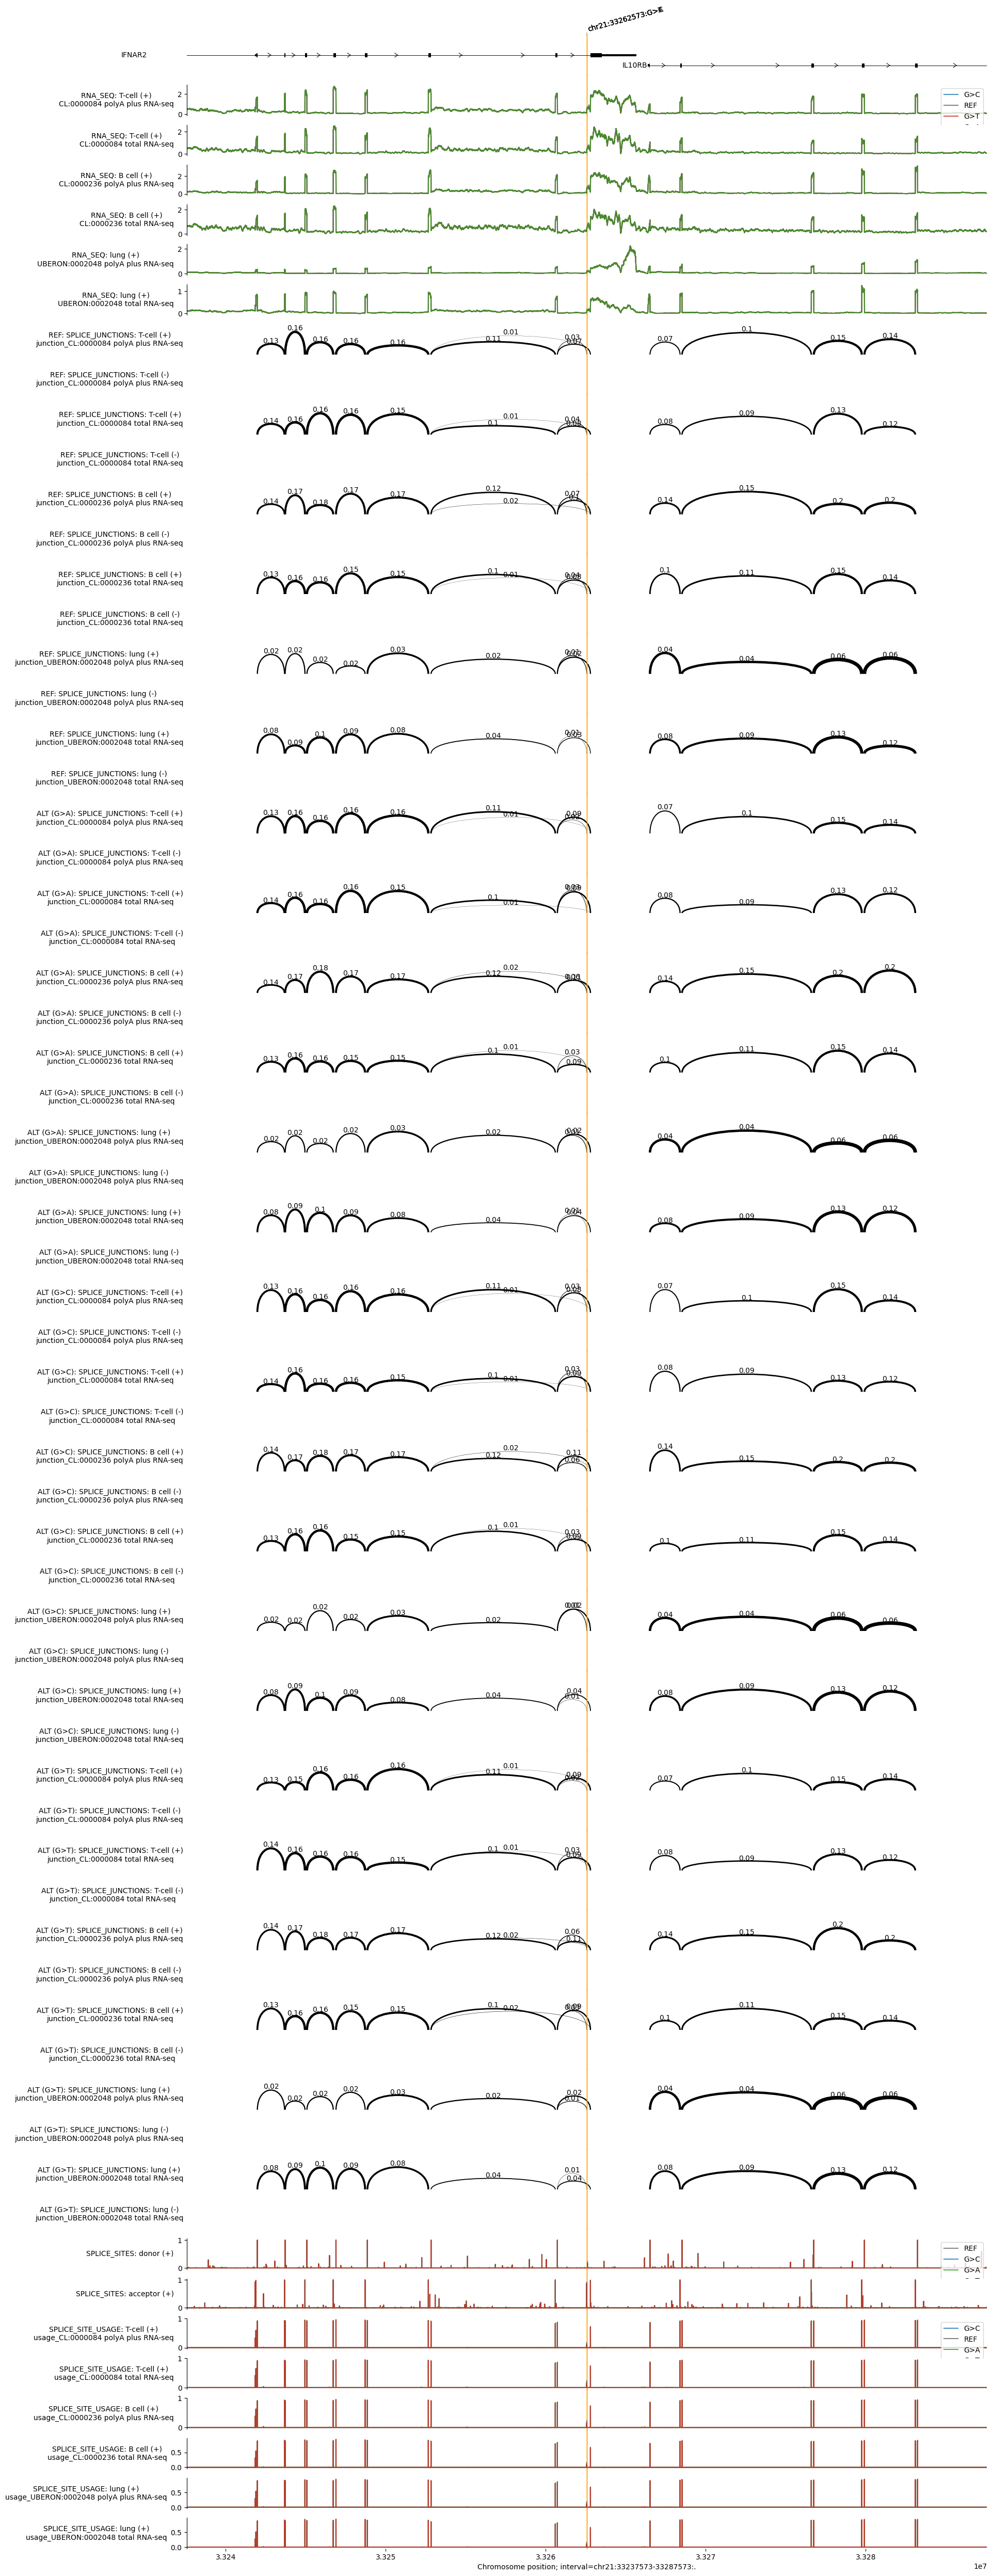

In [ ]:
# @title Plot predicted effect of all variants

# @markdown # Parameters
# @markdown ### Visualization Colors
# @markdown Specify the color for the reference allele and each alternative allele.
ref_color = 'dimgrey'  # @param { type: "string" }
alt_a_color = '#2ca02c'  # @param { type: "string" }
alt_c_color = '#1f77b4'  # @param { type: "string" }
alt_t_color = '#d62728'  # @param { type: "string" }

# @markdown ---
# @markdown ### Cell & Tissue Types
# @markdown Specify list of cell and tissue ontologies to visualize:
ontology_terms = ['UBERON:0002048', 'CL:0000084', 'CL:0000236']  # @param

# Examples:
# UBERON:0002048 > lung
# UBERON:0000955 > brain
# UBERON:0002101 > spleen
# CL:0000084 > T cell
# CL:0000236 > B cell

# @markdown ---
# @markdown ### Gene and Transcript Annotation
plot_gene_annotation = True  # @param { type: "boolean" }
plot_longest_transcript_only = True  # @param { type: "boolean" }

# @markdown ---
# @markdown ### Output Types to Plot
# @markdown Select which prediction tracks to display.
plot_rna_seq = True  # @param { type: "boolean" }
plot_cage = False  # @param { type: "boolean" }
plot_atac = True  # @param { type: "boolean" }
plot_dnase = False  # @param { type: "boolean" }
plot_chip_histone = False  # @param { type: "boolean" }
plot_chip_tf = False  # @param { type: "boolean" }
plot_splice_sites = True  # @param { type: "boolean" }
plot_splice_site_usage = True  # @param { type: "boolean" }
plot_splice_junctions = True # @param { type: "boolean" }
plot_contact_maps = False  # @param { type: "boolean" }


# @markdown ---
# @markdown ### Other Visualization Options
# @markdown Option to filter tracks to only a specific DNA strand:
filter_to_positive_strand = True  # @param { type: "boolean" }
filter_to_negative_strand = False  # @param { type: "boolean" }
if filter_to_positive_strand and filter_to_negative_strand:
  raise ValueError(
      'Cannot specify both filter_to_positive_strand and '
      'filter_to_negative_strand.'
  )

# @markdown Plotting window size and position:
plot_interval_width = 50000 # @param { type: "slider", min: 2048, max: 1048576, step: 2048}
plot_interval_shift = 0 # @param { type: "slider", min: -524288, max: 524288, step: 2048}

# --- SCRIPT SETUP AND EXECUTION ---

# Import necessary modules
from alphagenome.data import transcript as transcript_utils
from alphagenome.data import gene_annotation
from alphagenome.visualization import plot_components
from alphagenome.data import genome
from alphagenome.models import dna_output
from alphagenome.models import dna_client
import pandas as pd

organism = 'human'  # @param ["human", "mouse"] {type:"string"}
organism_map = {
    'human': dna_client.Organism.HOMO_SAPIENS
}
organism = organism_map[organism]

# Define all possible alternative bases
all_alternate_bases = ['A', 'C', 'T']
if variant_reference_bases in all_alternate_bases:
    all_alternate_bases.remove(variant_reference_bases)

# Create a list of all variant objects to be analyzed
all_variants = [
    genome.Variant(
        chromosome=variant_chromosome,
        position=variant_position,
        reference_bases=variant_reference_bases,
        alternate_bases=alt_base,
    )
    for alt_base in all_alternate_bases
]

# The input interval is derived from the first variant (centered on it).
# The sequence length should match the one used for scoring.
sequence_length = dna_client.SUPPORTED_SEQUENCE_LENGTHS['SEQUENCE_LENGTH_100KB']
interval = all_variants[0].reference_interval.resize(sequence_length)

# Establish color mapping for all variants
variant_colors = { 'REF': ref_color }
base_to_color = {'A': alt_a_color, 'C': alt_c_color, 'T': alt_t_color}
for var in all_variants:
    key = f'{var.reference_bases}>{var.alternate_bases}'
    variant_colors[key] = base_to_color.get(var.alternate_bases, 'black')


# --- GENE ANNOTATION SETUP ---

# Cache for transcript extractors to avoid reloading data
if '_transcript_extractor_cache' not in globals():
  _transcript_extractor_cache = {}

# Load gene annotation if not already cached for the organism
if organism in _transcript_extractor_cache:
  transcript_extractor, longest_transcript_extractor = (
      _transcript_extractor_cache[organism]
  )
else:
  match organism:
    case dna_client.Organism.HOMO_SAPIENS:
      gtf_path = HG38_GTF_FEATHER
    case dna_client.Organism.MUS_MUSCULUS:
      gtf_path = MM10_GTF_FEATHER
    case _:
      raise ValueError(f'Unsupported organism: {organism}')

  gtf = pd.read_feather(gtf_path)
  gtf_transcript = gene_annotation.filter_transcript_support_level(
      gene_annotation.filter_protein_coding(gtf), ['1']
  )
  transcript_extractor = transcript_utils.TranscriptExtractor(gtf_transcript)
  gtf_longest_transcript = gene_annotation.filter_to_longest_transcript(
      gtf_transcript
  )
  longest_transcript_extractor = transcript_utils.TranscriptExtractor(
      gtf_longest_transcript
  )
  _transcript_extractor_cache[organism] = (
      transcript_extractor,
      longest_transcript_extractor,
  )


# --- PREDICTION AND CACHING ---

# Cache for predictions to avoid re-computing
if '_prediction_cache' not in globals():
  _prediction_cache = {}

def _predict_variant_cached(
    interval, variant, organism, requested_outputs, ontology_terms
):
  """Cache wrapper of dna_model.predict_variant."""
  cache_key = (
      str(interval),
      str(variant),
      str(organism),
      tuple(sorted(requested_outputs)),
      tuple(sorted(ontology_terms)),
  )
  if cache_key in _prediction_cache:
    return _prediction_cache[cache_key]
  result = dna_model.predict_variant(
      interval=interval,
      variant=variant,
      organism=organism,
      requested_outputs=requested_outputs,
      ontology_terms=ontology_terms,
  )
  _prediction_cache[cache_key] = result
  return result

# Run predictions for all variants
print(f"Running predictions for {len(all_variants)} variants...")
all_predictions = {}
for var in all_variants:
    variant_name = f'{var.reference_bases}>{var.alternate_bases}'
    print(f"Predicting for variant: {variant_name}")
    output = _predict_variant_cached(
        interval=interval,
        variant=var,
        organism=organism,
        requested_outputs=[*dna_client.OutputType],
        ontology_terms=ontology_terms,
    )
    all_predictions[variant_name] = output
print("All predictions complete.")


# --- PLOT BUILDING ---

# Extract the reference prediction (it's the same in all outputs)
ref_prediction = list(all_predictions.values())[0].reference

# Filter to DNA strand if requested
if filter_to_positive_strand:
  ref_prediction = ref_prediction.filter_to_strand(strand='+')
  for var_name, output in all_predictions.items():
    all_predictions[var_name] = dna_output.VariantOutput(
        reference=output.reference,
        alternate=output.alternate.filter_to_strand(strand='+')
    )
elif filter_to_negative_strand:
  ref_prediction = ref_prediction.filter_to_strand(strand='-')
  for var_name, output in all_predictions.items():
      all_predictions[var_name] = dna_output.VariantOutput(
        reference=output.reference,
        alternate=output.alternate.filter_to_strand(strand='-')
    )


# Build plot components
components = []

# Add Gene and transcript annotation track
if plot_gene_annotation:
  extractor = (
      longest_transcript_extractor
      if plot_longest_transcript_only
      else transcript_extractor
  )
  transcripts = extractor.extract(interval)
  components.append(plot_components.TranscriptAnnotation(transcripts))

# Map plot checkboxes to data types
plot_map = {
    'plot_atac': (ref_prediction.atac, 'atac', 'ATAC'),
    'plot_cage': (ref_prediction.cage, 'cage', 'CAGE'),
    'plot_chip_histone': (ref_prediction.chip_histone, 'chip_histone', 'CHIP_HISTONE'),
    'plot_chip_tf': (ref_prediction.chip_tf, 'chip_tf', 'CHIP_TF'),
    'plot_contact_maps': (ref_prediction.contact_maps, 'contact_maps', 'CONTACT_MAPS'),
    'plot_dnase': (ref_prediction.dnase, 'dnase', 'DNASE'),
    'plot_rna_seq': (ref_prediction.rna_seq, 'rna_seq', 'RNA_SEQ'),
    'plot_splice_junctions': (ref_prediction.splice_junctions, 'splice_junctions', 'SPLICE_JUNCTIONS'),
    'plot_splice_sites': (ref_prediction.splice_sites, 'splice_sites', 'SPLICE_SITES'),
    'plot_splice_site_usage': (
        ref_prediction.splice_site_usage,
        'splice_site_usage',
        'SPLICE_SITE_USAGE',
    ),
}

# Loop through each plot type and add the corresponding component
for key, (ref_data, data_name, output_type) in plot_map.items():
  if not eval(key) or ref_data is None:
    continue

  if ref_data.values.shape[-1] == 0:
      print(
          f'Requested plot for output {output_type} but no tracks exist in'
          ' output. This is likely because this output does not exist for your'
          ' ontologies or requested DNA strand.'
      )
      continue

  # Define the label template for the y-axis
  match output_type:
    case 'CHIP_HISTONE':
      ylabel_template = f'{output_type}: {{biosample_name}} ({{strand}})\n{{histone_mark}}'
    case 'CHIP_TF':
      ylabel_template = f'{output_type}: {{biosample_name}} ({{strand}})\n{{transcription_factor}}'
    case 'SPLICE_SITES':
      ylabel_template = f'{output_type}: {{name}} ({{strand}})'
    case _:
      ylabel_template = f'{output_type}: {{biosample_name}} ({{strand}})\n{{name}}'

  # --- Special handling for Sashimi plots (stack them) ---
  if output_type == 'SPLICE_JUNCTIONS':
      # Add REF plot
      components.append(plot_components.Sashimi(
          ref_data,
          ylabel_template='REF: ' + ylabel_template,
          # color=variant_colors['REF'] # Removed color argument
      ))
      # Add a plot for each ALT
      for var_name, prediction in all_predictions.items():
          alt_data = getattr(prediction.alternate, data_name)
          if alt_data:
              components.append(plot_components.Sashimi(
                  alt_data,
                  ylabel_template=f'ALT ({var_name}): ' + ylabel_template,
                  # color=variant_colors[var_name] # Removed color argument
              ))

  # --- Handling for Contact Maps (not fully supported in this multi-variant script) ---
  elif output_type == 'CONTACT_MAPS':
       print(f"Skipping {output_type} plot: Multi-variant diff not implemented.")
       continue

  # --- Standard handling for all other tracks (overlay them) ---
  else:
      # Consolidate data from REF and all ALTs into one dictionary
      tdata = {'REF': ref_data}
      for var_name, prediction in all_predictions.items():
          alt_data = getattr(prediction.alternate, data_name)
          if alt_data:
              tdata[var_name] = alt_data

      component = plot_components.OverlaidTracks(
          tdata=tdata,
          colors=variant_colors,
          ylabel_template=ylabel_template,
      )
      components.append(component)

# Final plot validation and rendering
if plot_interval_width > interval.width:
  raise ValueError(
      f'plot_interval_width ({plot_interval_width}) must be less than '
      f'interval.width ({interval.width}).'
  )

if not components:
    print("No data available to plot for the selected options. Please check your selections.")
else:
    plot = plot_components.plot(
        components=components,
        interval=interval.shift(plot_interval_shift).resize(plot_interval_width),
        annotations=[
            plot_components.VariantAnnotation(all_variants),
        ],
    )

In [ ]:
# @title Higlight important gene regions with in silico saturation mutagenesis
# @markdown To highlight which regions in a DNA sequence are functionally important for a final variant prediction, we can perform an in silico mutagenesis (ISM) analysis by scoring all possible single nucleotide variants in a specific interval.

# @markdown We define an ism_interval, which is a relatively small region of DNA that we want to systematically mutate. We also define the sequence_interval, which is the contextual interval the model will use when making predictions for each variant.

# 2KB DNA sequence to use as context when making predictions.
sequence_interval = genome.Interval('chr20', 3_753_000, 3_753_400)
sequence_interval = sequence_interval.resize(dna_client.SEQUENCE_LENGTH_2KB)

# Mutate all bases in the central 256-base region of the sequence_interval.
ism_interval = sequence_interval.resize(256)

# @markdown Next, we define the scorer we want to use to score each of the ISM variants. Here, we use a center mask scorer on predicted DNASE values, which will score each variant's effect on DNA accessibility in the 500bp vicinity.

dnase_variant_scorer = variant_scorers.CenterMaskScorer(
    requested_output=dna_client.OutputType.DNASE,
    width=501,
    aggregation_type=variant_scorers.AggregationType.DIFF_MEAN,
)

# @markdown Finally, we can use score_variants (notice the plural s) to score all variants. Note that this operation is quite expensive. For speed reasons, we recommend using shorter input sequences for the contextual sequence_interval and narrower ism_interval regions to mutate if possible.

variant_scores = dna_model.score_ism_variants(
    interval=sequence_interval,
    ism_interval=ism_interval,
    variant_scorers=[dnase_variant_scorer],
)


# The length of the returned variant_scores is 768, since we scored 768 variants (256 positions * 3 alternative bases per position):
len(variant_scores)


#To understand which positions are most influential in the predictions, we can visualize these scores using a sequence logo. This requires summarizing the scores into a single scalar value per variant.

# As an example, let's extract the DNASE score for just the K562 cell line, a widely used experimental model. Alternatively, you could average across multiple tissues to obtain a single scalar value.

def extract_k562(adata):
  values = adata.X[:, adata.var['ontology_curie'] == 'EFO:0002067']
  assert values.size == 1
  return values.flatten()[0]


ism_result = ism.ism_matrix(
    [extract_k562(x[0]) for x in variant_scores],
    variants=[v[0].uns['variant'] for v in variant_scores],
)

#The shape of ism_result is (256, 4) since we have 1 score per position per each of the 4 DNA bases.

# Note that in this case, our call to ism.ism_matrix() had the argument multiply_by_sequence set to 'True', so the output array contains non-zero values only for the bases corresponding to the reference sequence.
ism_result.shape

# @markdown Plot the contribution scores as a sequence logo:

plot_components.plot(
    [
        plot_components.SeqLogo(
            scores=ism_result,
            scores_interval=ism_interval,
            ylabel='ISM K562 DNase',
        )
    ],
    interval=ism_interval,
    fig_width=35,
)

plt.show()

NameError: name 'genome' is not defined